# PART II: Data Processing and Transformation
___

The goal of this part is to generate the final dataset used to train and test the moodels. Here, we are going to create new variables, transform data types, process NA values, join and merge variables from the datasets provided and calculate new quantities and information that might be relevant to get the best possible estimator.

We will use the insight gained in PART I and go over each dataset separately.

In [1]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from geopy.distance import vincenty
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set();

In [23]:
# read datasets
order_product = pd.read_csv('data/order_product.csv')
orders = pd.read_csv('data/orders.csv')
shoppers = pd.read_csv('data/shoppers.csv')
storebranch = pd.read_csv('data/storebranch.csv')

## 1. Order Product Dataset

Using this data we are interested in creating a new dataframe which will contain three variables:
1. order_id: Identification code for the order.
2. number_products: Number of products of the order.
3. found: A dummy variable representing if one or more products quantity of the order were not found.

In [43]:
# Add frequency column in order_product dataset to represent number of products
order_product['number_products'] = order_product.groupby('order_id')['order_id'].transform('count')

In [44]:
# generate new dataframe containing unique values of order
order_product_b = order_product.groupby('order_id').agg(np.mean)

In [45]:
# Add dummy variable in order_product_b. 
order_product_b['found'] = (order_product_b['quantity'] != order_product_b['quantity_found']).astype(int)

In [46]:
# drop variables that will not be used
order_product_b = order_product_b.drop(['quantity', 'quantity_found'], axis=1)

In [47]:
order_product_b.reset_index(level=0, inplace=True)
order_product_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7278 entries, 0 to 7277
Data columns (total 3 columns):
order_id           7278 non-null object
number_products    7278 non-null int64
found              7278 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 142.2+ KB


## 2. Orders Dataset

For the moment, we will just create dummy variables for `dow` and `on_demand` variables, and we will transform `promised_time` to numerical.

In [24]:
# transform on_demand to int
orders['on_demand'] = orders['on_demand'].astype(int)

In [25]:
# creat dummy variables for days of the week
orders = pd.concat([orders,pd.get_dummies(orders['dow'], prefix='dow')], axis=1)

In [26]:
# transforming promised_time to numerical
orders['promised_time'] = (pd.to_datetime(orders['promised_time'], format='%H:%M:%S').dt.hour + 
                           pd.to_datetime(orders['promised_time'], format='%H:%M:%S').dt.minute/60 + 
                           pd.to_datetime(orders['promised_time'], format='%H:%M:%S').dt.second/3600)

In [27]:
orders.head()

,order_id,lat,lng,dow,promised_time,actual_time,on_demand,picker_id,driver_id,store_branch_id,total_minutes,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,6abd5e28d01b7c733fe37485294235dc,18.221141,-100.313914,2,13.0,12:00:15,0,09bb5bfe76adbb474dddbdd111a51623,09bb5bfe76adbb474dddbdd111a51623,0dc6fb5924a8b917bc641666ed02663c,91.800861,0,0,1,0,0,0,0
1,0d37a1eea001f01b40232ffd496ff663,18.177712,-100.357051,2,13.0,10:28:10,0,c4c722114a82fa21654e57e9636d68b0,c4c722114a82fa21654e57e9636d68b0,2bbf833e689d24b697f1f3529c3f3c4b,206.599732,0,0,1,0,0,0,0
2,528428e9b9eb5d3bd0dbdd8da692b087,18.266832,-100.317553,2,11.0,10:40:50,0,e15c7a67d0ea9a54dffb410bc1d8528b,e15c7a67d0ea9a54dffb410bc1d8528b,8d891dfc0e29d744c15c18adced74a68,93.458001,0,0,1,0,0,0,0
3,d3f7be6d64eae7405b7bf024e04807a2,18.248884,-100.322622,2,10.0,09:41:47,0,d1f0bd4b237c1358f09db22076b940e7,d1f0bd4b237c1358f09db22076b940e7,0dc6fb5924a8b917bc641666ed02663c,124.778761,0,0,1,0,0,0,0
4,e0ad6533b6cd9a382ec6c1d473c5036c,18.229110,-100.322672,2,11.0,10:07:53,0,06a71e8ab0c6db5ce22a4689fd76a3f4,06a71e8ab0c6db5ce22a4689fd76a3f4,afd0a7b8d546fcc697bb93a5934b65c3,130.321208,0,0,1,0,0,0,0


## 3. Shoppers Dataset

We are interested in creating dummy variables for `seniority`. In addition, we are going to replace NAs for the variables `found_rate`, `rating` and `accepted_rate` with the average of each column. We are doing it this way since the number of NAs is low (as seen in PART I) and the distribution of these variables is quite skewed to the mean.

In [28]:
# creating dummies for seniority
shoppers = pd.concat([shoppers,pd.get_dummies(shoppers['seniority'], prefix='sen')], axis=1)

In [29]:
# replacing NAs
shoppers = shoppers.fillna(shoppers.mean())
shoppers.head()

,shopper_id,seniority,found_rate,picking_speed,accepted_rate,rating,sen_ADVANCED,sen_BEGINNER,sen_INTERMEDIATE,sen_REVIEW
0,087ab65ceca40dbef697f585dc159d5d,ADVANCED,0.8610,1.64,1.00,4.480000,1,0,0,0
1,645973c41314d763b58dc2bceeeeffc9,INTERMEDIATE,0.8337,2.83,0.96,4.790000,0,0,1,0
2,82810715fdda44962e7e422015ea1f32,ADVANCED,0.8681,1.27,0.88,4.840000,1,0,0,0
3,416aa7dbd5a2f58d7bca96657e8faa1e,INTERMEDIATE,0.8784,2.11,1.00,4.790919,0,0,1,0
4,27a3e845a4c3eb7ded4748f84140a843,ADVANCED,0.8466,1.50,1.00,4.840000,1,0,0,0


## 4. Storebranch Dataset

This dataset will be used to get the following information:
1. Estimate the distance between the storebranch and the delivery point.
2. Generate dummy variables for the store of each order.

In [30]:
# estimate distance between storebranch and delivery point. To do so, we will the geopy library
orders_b = pd.DataFrame()
orders_b = orders[['order_id','lat','lng','store_branch_id']]
orders_b = pd.merge(orders_b, storebranch[['store_branch_id','store','lat','lng']], on='store_branch_id', how='left')

In [31]:
orders_b = orders_b.rename(columns={'lat_x': 'lat_order','lng_x':'lng_order','lat_y':
                                    'lat_store_branch','lng_y':'lng_store_branch'})

In [32]:
# estimating distance in km
order_coordinates = list(zip(orders_b['lat_order'],orders_b['lng_order']))
store_branch_coordinates = list(zip(orders_b['lat_store_branch'],orders_b['lng_store_branch']))

distance = []
for i,j in zip(order_coordinates,store_branch_coordinates):
    distance.append(vincenty(i, j).km)

orders_b['order_sb_distance'] = distance

In [33]:
# create dummies for store
# first we re-code the store names
new_store_names = [i for i in range(1,(len(orders_b['store'].unique()))+1)]
orders_b['store'] = orders_b['store'].replace(to_replace=orders_b['store'].unique(), value=new_store_names)

In [34]:
# now create dummies
orders_b = pd.concat([orders_b,pd.get_dummies(orders_b['store'], prefix='store')], axis=1)

In [35]:
# drop unnecessary variables
orders_b = orders_b.drop(columns=['lat_order','lng_order','store_branch_id','store','lat_store_branch','lng_store_branch'])

In [36]:
orders_b.head()

,order_id,order_sb_distance,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,store_11,store_12,store_13,store_14,store_15,store_16,store_17
0,6abd5e28d01b7c733fe37485294235dc,1.618392,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0d37a1eea001f01b40232ffd496ff663,3.335921,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,528428e9b9eb5d3bd0dbdd8da692b087,2.826701,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,d3f7be6d64eae7405b7bf024e04807a2,2.756840,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,e0ad6533b6cd9a382ec6c1d473c5036c,0.906933,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# 5. Merging Final Dataset
The name of the dataset will be **model_data**

In [96]:
model_data = pd.DataFrame()

In [97]:
# first we add relevant data from orders dataset
model_data = orders[['order_id','promised_time','on_demand','picker_id','driver_id','total_minutes']]

In [98]:
# from the order_product_b dataset, we need to add number_products and found variables
model_data = pd.merge(model_data, order_product_b[['order_id','number_products','found']], on='order_id', how='left')

In [99]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7295 entries, 0 to 7294
Data columns (total 8 columns):
order_id           7295 non-null object
promised_time      7295 non-null float64
on_demand          7295 non-null int32
picker_id          7295 non-null object
driver_id          7295 non-null object
total_minutes      6543 non-null float64
number_products    7278 non-null float64
found              7278 non-null float64
dtypes: float64(4), int32(1), object(3)
memory usage: 484.4+ KB


In [100]:
# from shoppers dataset , we need to add the dummies of seniority, for both pickers and drivers
# picker_id
model_data = pd.merge(model_data, shoppers[['shopper_id','sen_ADVANCED','sen_BEGINNER','sen_INTERMEDIATE',
                                            'sen_REVIEW']], left_on='picker_id', right_on='shopper_id', how='left')


In [101]:
# driver_id
model_data = pd.merge(model_data, shoppers[['shopper_id','sen_ADVANCED','sen_BEGINNER','sen_INTERMEDIATE',
                                            'sen_REVIEW']], left_on='driver_id', right_on='shopper_id', how='left')

In [102]:
# from the store_branch and orders_b datasets, we need to add the store dummies and the distance between storebranchs
# and delivery points
model_data = pd.merge(model_data, orders_b, on='order_id', how='left')

In [104]:
# now we drop unnecessary variables
model_data = model_data.drop(columns=['picker_id', 'driver_id', 'shopper_id_x','shopper_id_y'])

Finally, we drop the orders which don't have products info (the orders that are not found in the order_product dataset). We are dropping them and not processing them because there's only a few of them and we don't have the neccesary insights to assume a value for the variable `found.`

In [108]:
# drop rows where number_products and found are NA.
model_data = model_data.dropna(subset=['found'])

In [109]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7278 entries, 0 to 7294
Data columns (total 32 columns):
order_id              7278 non-null object
promised_time         7278 non-null float64
on_demand             7278 non-null int32
total_minutes         6528 non-null float64
number_products       7278 non-null float64
found                 7278 non-null float64
sen_ADVANCED_x        7278 non-null uint8
sen_BEGINNER_x        7278 non-null uint8
sen_INTERMEDIATE_x    7278 non-null uint8
sen_REVIEW_x          7278 non-null uint8
sen_ADVANCED_y        7278 non-null uint8
sen_BEGINNER_y        7278 non-null uint8
sen_INTERMEDIATE_y    7278 non-null uint8
sen_REVIEW_y          7278 non-null uint8
order_sb_distance     7278 non-null float64
store_1               7278 non-null uint8
store_2               7278 non-null uint8
store_3               7278 non-null uint8
store_4               7278 non-null uint8
store_5               7278 non-null uint8
store_6               7278 non-null uint8


## 6. Visualization of Model Dataset
To conclude this part, we will generate some plots to visualize our final data.

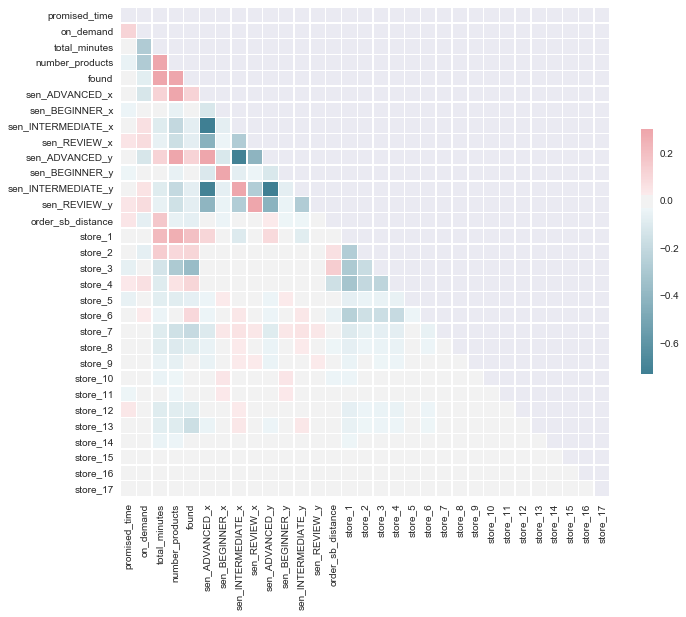

In [110]:
# correlation heat matrix (no total_minutes NA)
corr = model_data.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [111]:
# checking variables with a correlation >=|0.1|
corr.loc[(corr['total_minutes'] >= 0.1) | (corr['total_minutes']<= -0.1)].index

Index(['on_demand', 'total_minutes', 'number_products', 'found',
       'sen_ADVANCED_x', 'sen_ADVANCED_y', 'order_sb_distance', 'store_1',
       'store_2', 'store_3'],
      dtype='object')

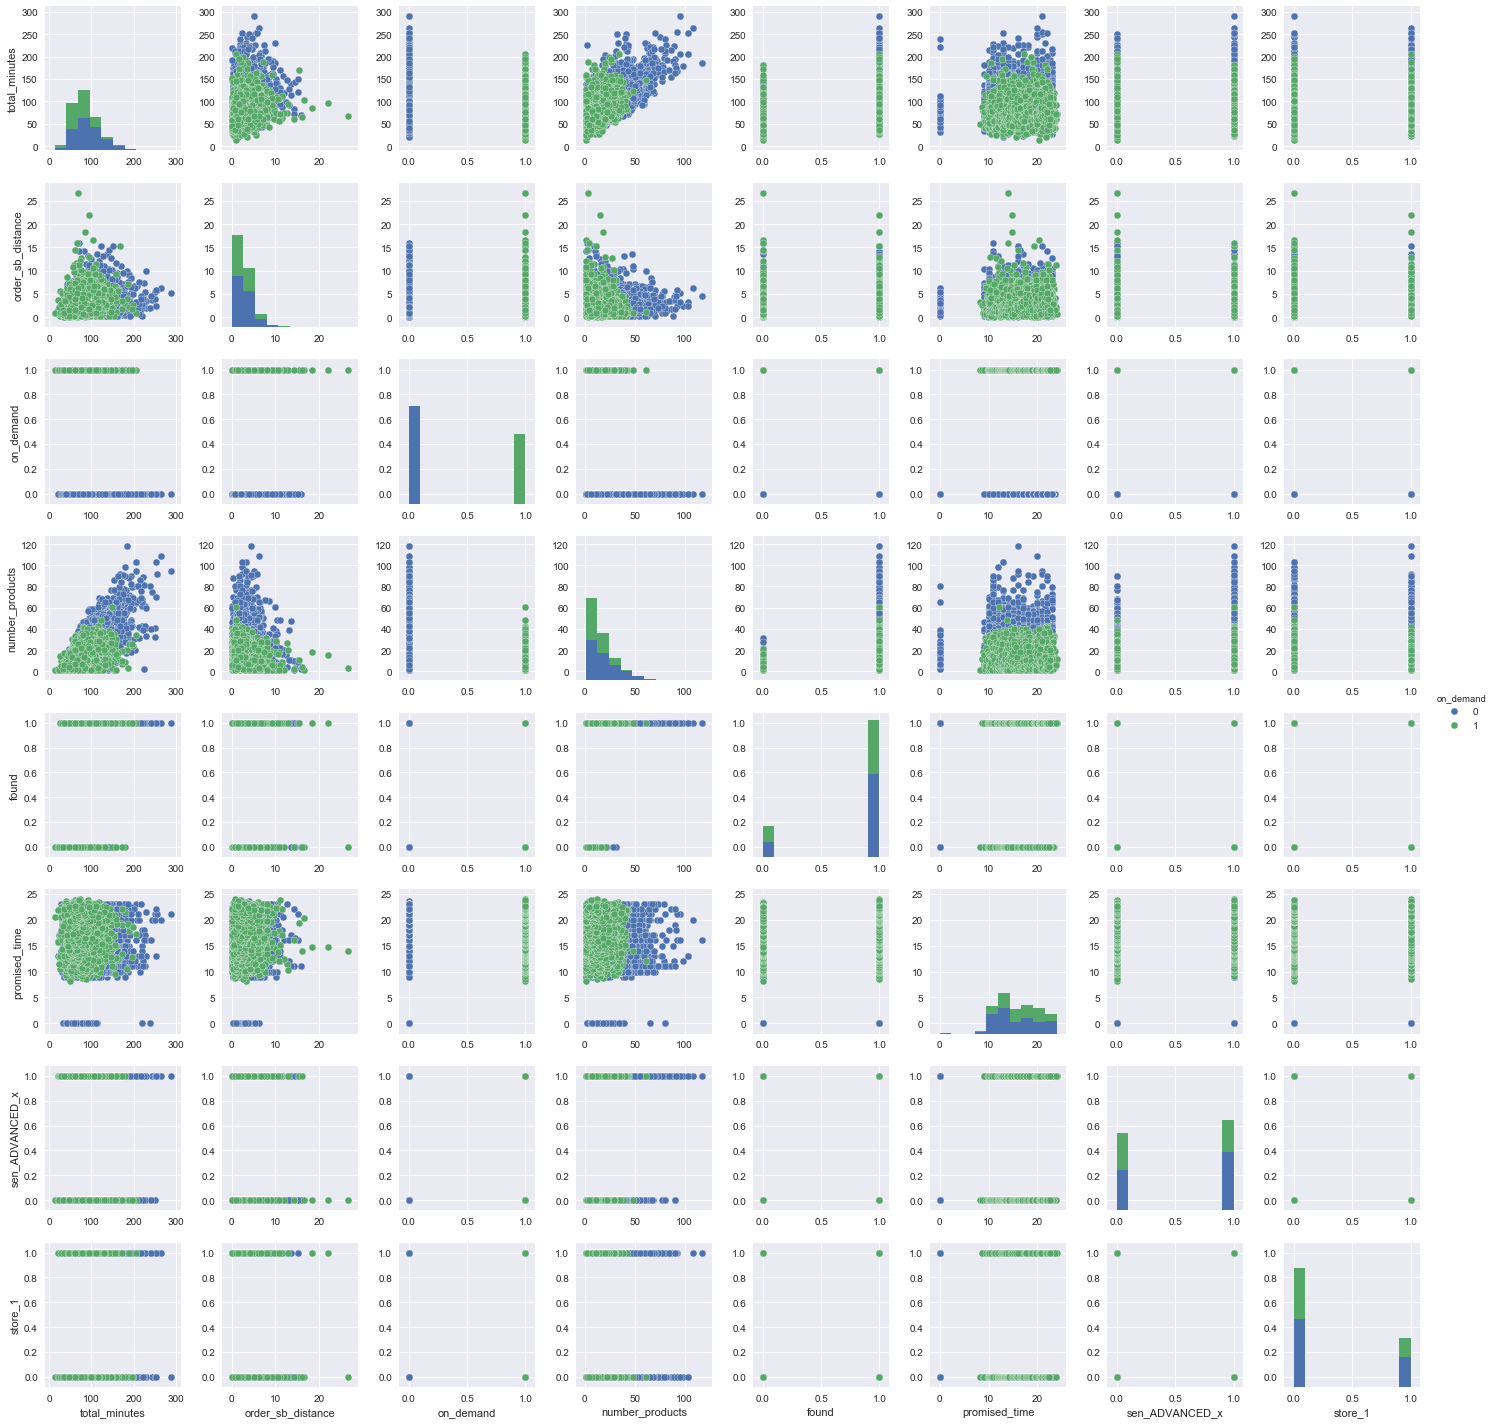

In [112]:
# scatter plots of some variables
sns.pairplot(model_data[['total_minutes','order_sb_distance','on_demand','number_products',
                         'found','promised_time','sen_ADVANCED_x','store_1']].dropna(), hue='on_demand');

In [113]:
# finally we export our data for next part
model_data.to_csv(path_or_buf='data/model_data.csv', index=False)